### Import necessery libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the dataset and EDA

In [2]:
df=pd.read_csv('Titanic_dataset.csv')

In [3]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
df.shape

(891, 12)

In [5]:
len(df[df.duplicated()])

0

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isna().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [11]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S


In [12]:
df.shape

(891, 8)

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

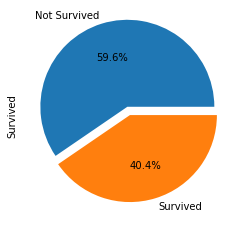

In [16]:
df['Survived'].value_counts().plot(kind='pie', labels=['Not Survived','Survived'], autopct='%1.1f%%',explode=[0.1,0])
plt.show()

In [17]:
df['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

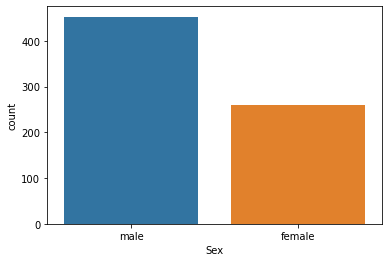

In [18]:
sns.countplot(data=df,x='Sex')
plt.show()

In [19]:
df['Sex']=[1 if x=='male' else 0 for x in df['Sex']]

In [20]:
df['Sex'].value_counts()

1    453
0    259
Name: Sex, dtype: int64

In [21]:
df['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [22]:
Embarked=pd.get_dummies(df['Embarked'], drop_first=True)
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [23]:
df.drop('Embarked',axis=1,inplace=True)
df=pd.concat([df,Embarked],axis=1)

In [24]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1


In [25]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [26]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5], dtype=int64)

### Model building and evolution

In [27]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((498, 8), (214, 8), (498,), (214,))

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [31]:
X_train.iloc[:,[0,2,3,4,5]]=ss.fit_transform(X_train.iloc[:,[0,2,3,4,5]])
X_test.iloc[:,[0,2,3,4,5]]=ss.transform(X_test.iloc[:,[0,2,3,4,5]])

In [32]:
X_train.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
58,-0.285621,0,-1.700133,0.497223,1.919332,-0.088802,0,1
57,0.909668,1,-0.089622,-0.547574,-0.470236,-0.525538,0,0
96,-1.480911,1,2.823005,-0.547574,-0.470236,0.058138,0,0
210,0.909668,1,-0.398018,-0.547574,-0.470236,-0.529352,0,1


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [34]:
lr= LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [35]:
y_pred=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

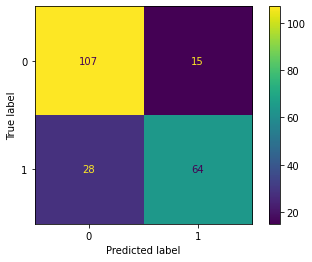

In [36]:
ConfusionMatrixDisplay.from_estimator(lr,X_test,Y_test)  
plt.show()

In [37]:
print('Train accuracy score:',accuracy_score(Y_train,y_pred_train))
print('Test accuracy score:',accuracy_score(Y_test,y_pred))

Train accuracy score: 0.8172690763052208
Test accuracy score: 0.7990654205607477


In [38]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.81      0.70      0.75        92

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



## Naive Bayes 

In [39]:
gn=GaussianNB()
gn.fit(X_train,Y_train)

GaussianNB()

In [40]:
y_pred=gn.predict(X_test)
y_pred_train=gn.predict(X_train)

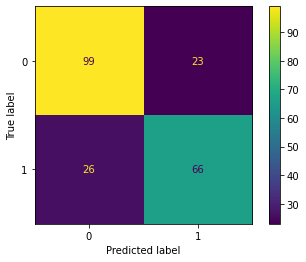

In [41]:
ConfusionMatrixDisplay.from_estimator(gn,X_test,Y_test)  
plt.show()

In [42]:
print('Train accuracy score:',accuracy_score(Y_train,y_pred_train))
print('Test accuracy score:',accuracy_score(Y_test,y_pred))

Train accuracy score: 0.7951807228915663
Test accuracy score: 0.7710280373831776


In [43]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       122
           1       0.74      0.72      0.73        92

    accuracy                           0.77       214
   macro avg       0.77      0.76      0.77       214
weighted avg       0.77      0.77      0.77       214



## KNN 

In [44]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [45]:
y_pred=knn.predict(X_test)
y_pred_train=knn.predict(X_train)

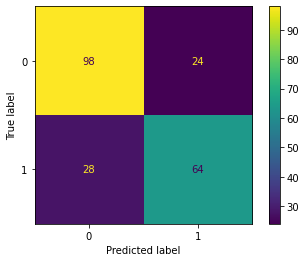

In [46]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,Y_test)  
plt.show()

In [47]:
print('Train accuracy score:',accuracy_score(Y_train,y_pred_train))
print('Test accuracy score:',accuracy_score(Y_test,y_pred))

Train accuracy score: 0.8554216867469879
Test accuracy score: 0.7570093457943925


### Choosing optimal k value 

In [48]:
error_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))
    
error_rate

[0.26635514018691586,
 0.2570093457943925,
 0.21962616822429906,
 0.22897196261682243,
 0.24299065420560748,
 0.2383177570093458,
 0.2616822429906542,
 0.2616822429906542,
 0.26635514018691586,
 0.24299065420560748,
 0.27102803738317754,
 0.26635514018691586,
 0.26635514018691586,
 0.2757009345794392,
 0.2757009345794392,
 0.26635514018691586,
 0.26635514018691586,
 0.2570093457943925,
 0.2897196261682243,
 0.2616822429906542,
 0.26635514018691586,
 0.26635514018691586,
 0.27102803738317754,
 0.2570093457943925,
 0.2616822429906542,
 0.2616822429906542,
 0.27102803738317754,
 0.24766355140186916,
 0.24299065420560748]

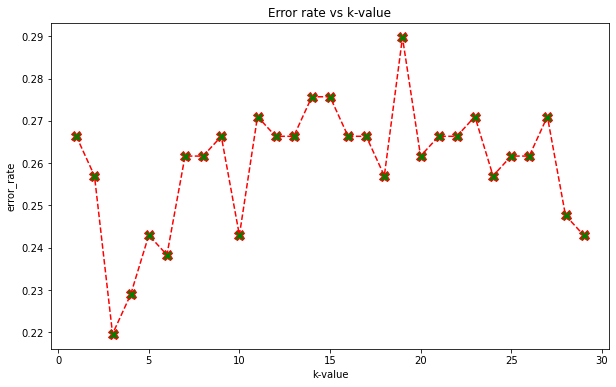

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='red',linestyle='dashed',marker='X',markerfacecolor='green', markersize=10)
plt.title('Error rate vs k-value')
plt.xlabel('k-value')
plt.ylabel('error_rate')
plt.show()

So the optimal value of k is 3.

In [50]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred=knn.predict(X_test)
y_pred_train=knn.predict(X_train)

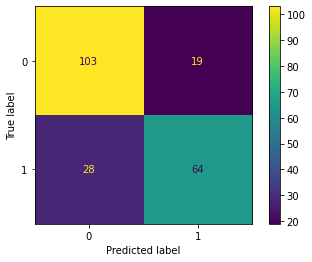

In [52]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,Y_test)  
plt.show()

In [53]:
print('Train accuracy score:',accuracy_score(Y_train,y_pred_train))
print('Test accuracy score:',accuracy_score(Y_test,y_pred))

Train accuracy score: 0.8855421686746988
Test accuracy score: 0.780373831775701


In [54]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       122
           1       0.77      0.70      0.73        92

    accuracy                           0.78       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214

